Preprocessing


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv("restaurant_data.csv")
df.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [4]:
df.shape

(8368, 17)

In [5]:
df.columns.tolist()

['Name',
 'Location',
 'Cuisine',
 'Rating',
 'Seating Capacity',
 'Average Meal Price',
 'Marketing Budget',
 'Social Media Followers',
 'Chef Experience Years',
 'Number of Reviews',
 'Avg Review Length',
 'Ambience Score',
 'Service Quality Score',
 'Parking Availability',
 'Weekend Reservations',
 'Weekday Reservations',
 'Revenue']

In [6]:
df.isnull().sum()

Name                      0
Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64

In [7]:
df.describe()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8.368000e+03
mean,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,6.560706e+05
std,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,20.025415,20.004277,2.674137e+05
min,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,0.000000,0.000000,1.847085e+05
25%,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,13.000000,13.000000,4.546514e+05
50%,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,27.000000,26.000000,6.042421e+05
75%,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,43.000000,43.000000,8.130942e+05
max,5.000000,90.000000,76.000000,9978.000000,103777.000000,19.000000,999.000000,299.984924,10.000000,10.000000,88.000000,88.000000,1.531868e+06


In [8]:
df.nunique()

Name                      8368
Location                     3
Cuisine                      6
Rating                      21
Seating Capacity            61
Average Meal Price        3966
Marketing Budget          4396
Social Media Followers    7799
Chef Experience Years       19
Number of Reviews          949
Avg Review Length         8368
Ambience Score              91
Service Quality Score       91
Parking Availability         2
Weekend Reservations        89
Weekday Reservations        89
Revenue                   8368
dtype: int64

In [9]:
numerical_column=df._get_numeric_data().columns.tolist()

In [10]:
numerical_column

['Rating',
 'Seating Capacity',
 'Average Meal Price',
 'Marketing Budget',
 'Social Media Followers',
 'Chef Experience Years',
 'Number of Reviews',
 'Avg Review Length',
 'Ambience Score',
 'Service Quality Score',
 'Weekend Reservations',
 'Weekday Reservations',
 'Revenue']

In [11]:
categorical_column=df.select_dtypes(include=['category', object]).columns.tolist()

In [12]:
categorical_column

['Name', 'Location', 'Cuisine', 'Parking Availability']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

In [14]:
df['Name'].unique()

array(['Restaurant 0', 'Restaurant 1', 'Restaurant 2', ...,
       'Restaurant 8365', 'Restaurant 8366', 'Restaurant 8367'],
      dtype=object)

In [15]:
df['Location'].unique()

array(['Rural', 'Downtown', 'Suburban'], dtype=object)

In [16]:
df['Location'].value_counts()

Location
Downtown    2821
Suburban    2785
Rural       2762
Name: count, dtype: int64

In [17]:
df['Cuisine'].unique()

array(['Japanese', 'Mexican', 'Italian', 'Indian', 'French', 'American'],
      dtype=object)

In [18]:
df['Cuisine'].value_counts()

Cuisine
French      1433
American    1416
Italian     1413
Mexican     1393
Indian      1369
Japanese    1344
Name: count, dtype: int64

In [19]:
df['Parking Availability'].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
df['Parking Availability'].value_counts()

Parking Availability
Yes    4189
No     4179
Name: count, dtype: int64

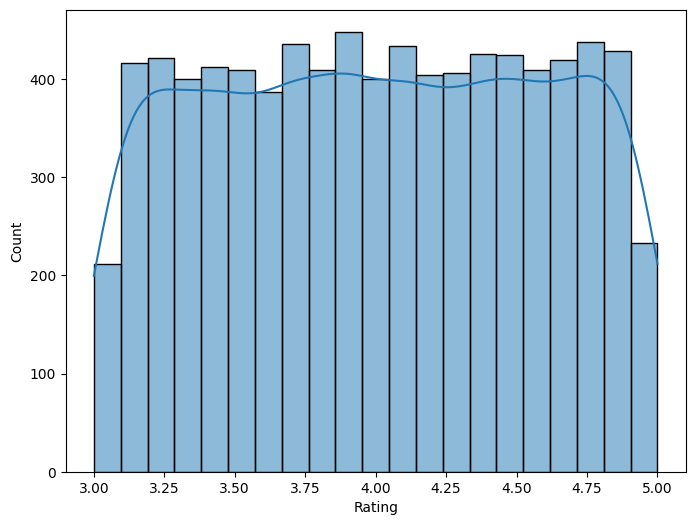

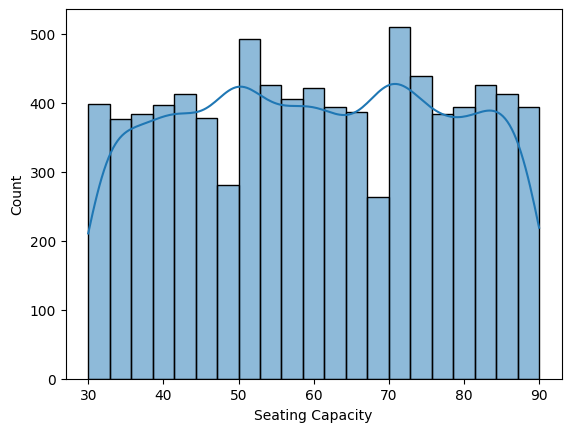

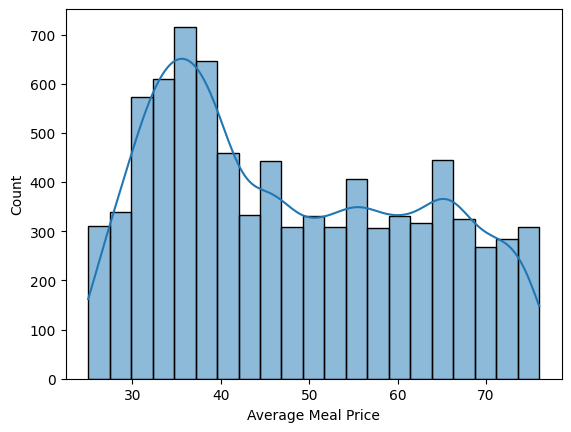

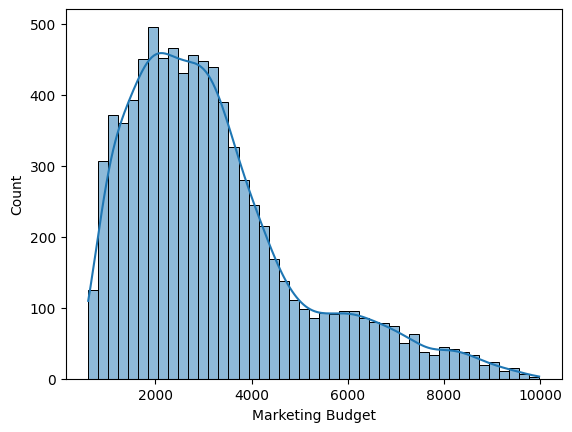

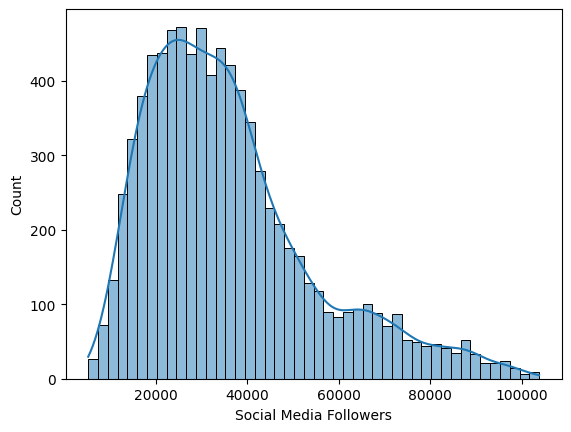

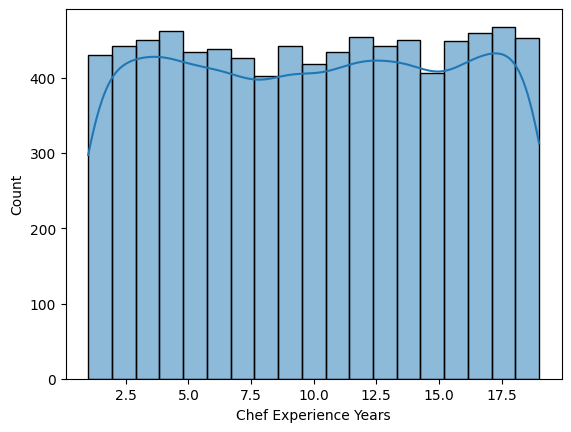

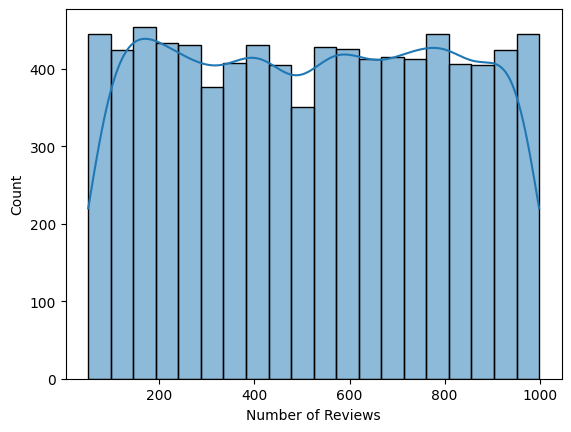

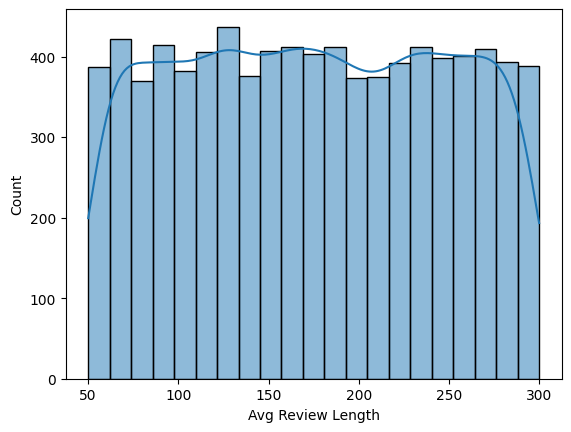

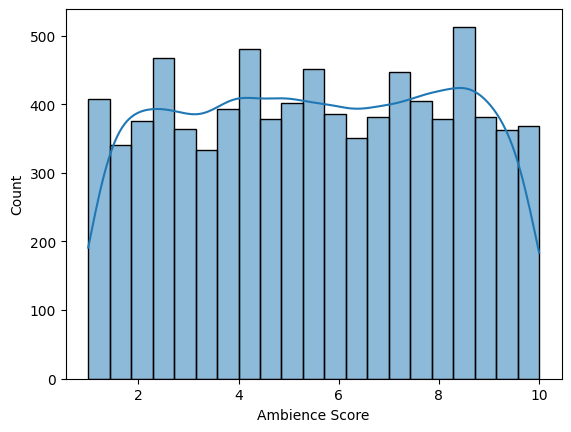

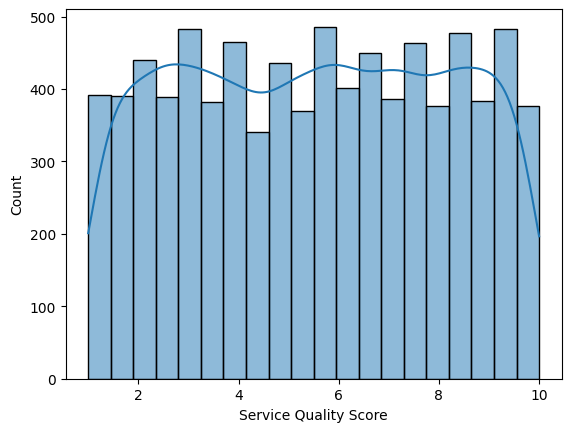

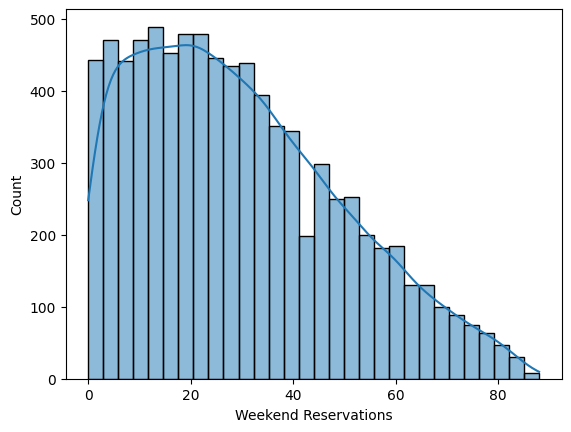

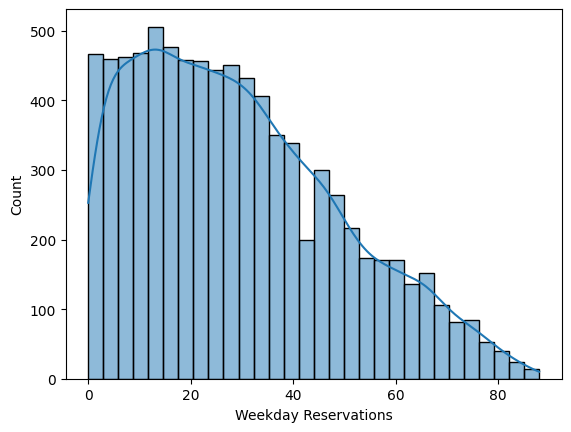

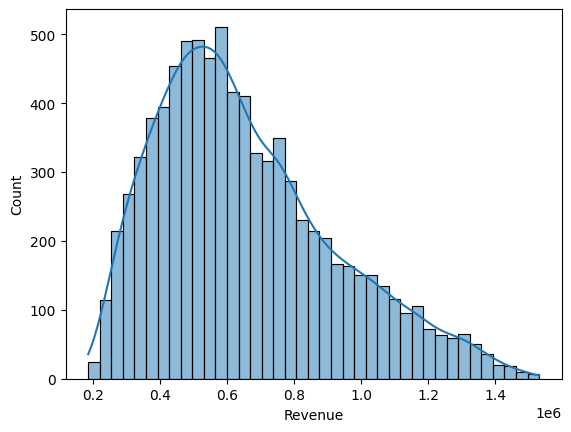

In [21]:
plt.figure(figsize=(8,6))
x=0
for i in numerical_column:
    sb.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [22]:
df[numerical_column].corr()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
Rating,1.000000,0.004862,-0.002265,0.263448,0.289559,0.022192,-0.004238,-0.001272,0.007099,0.000887,-0.000274,0.001706,0.009899
Seating Capacity,0.004862,1.000000,-0.028809,0.509560,0.496917,0.010324,-0.016100,-0.032670,0.002842,-0.006400,0.437416,0.418636,0.677317
Average Meal Price,-0.002265,-0.028809,1.000000,-0.002054,-0.005753,0.000401,0.001802,0.016013,-0.001094,0.011714,-0.018072,-0.027837,0.686365
Marketing Budget,0.263448,0.509560,-0.002054,1.000000,0.987511,0.021612,-0.008985,-0.030064,0.008120,-0.000693,0.225355,0.221088,0.365322
Social Media Followers,0.289559,0.496917,-0.005753,0.987511,1.000000,0.022943,-0.009181,-0.025464,0.007428,0.000210,0.218451,0.214612,0.354466
Chef Experience Years,0.022192,0.010324,0.000401,0.021612,0.022943,1.000000,-0.007710,0.001865,-0.001288,-0.008508,-0.000372,-0.008823,0.026899
Number of Reviews,-0.004238,-0.016100,0.001802,-0.008985,-0.009181,-0.007710,1.000000,0.005842,0.010186,0.005432,0.000780,-0.006126,-0.008233
Avg Review Length,-0.001272,-0.032670,0.016013,-0.030064,-0.025464,0.001865,0.005842,1.000000,0.004807,0.008836,-0.014241,-0.011020,-0.011278
Ambience Score,0.007099,0.002842,-0.001094,0.008120,0.007428,-0.001288,0.010186,0.004807,1.000000,0.000612,-0.012207,-0.016652,0.003388
Service Quality Score,0.000887,-0.006400,0.011714,-0.000693,0.000210,-0.008508,0.005432,0.008836,0.000612,1.000000,-0.002689,0.004204,0.005375


<Axes: >

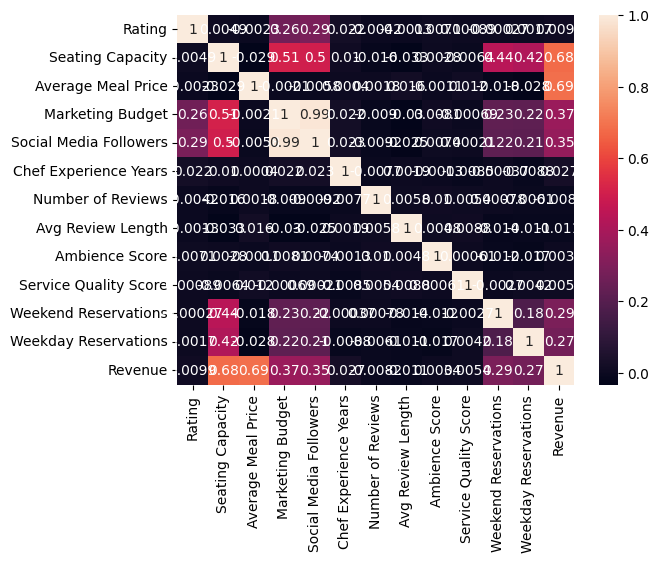

In [23]:
sb.heatmap(df[numerical_column].corr(),annot=True)

In [24]:
df[categorical_column]

,Name,Location,Cuisine,Parking Availability
0,Restaurant 0,Rural,Japanese,Yes
1,Restaurant 1,Downtown,Mexican,Yes
2,Restaurant 2,Rural,Italian,No
3,Restaurant 3,Rural,Italian,Yes
4,Restaurant 4,Downtown,Japanese,No
...,...,...,...,...
8363,Restaurant 8363,Suburban,Indian,Yes
8364,Restaurant 8364,Rural,Indian,No
8365,Restaurant 8365,Downtown,Italian,Yes
8366,Restaurant 8366,Rural,American,No


In [25]:
df['Location'].unique()

array(['Rural', 'Downtown', 'Suburban'], dtype=object)

In [26]:
df['Cuisine'].unique()

array(['Japanese', 'Mexican', 'Italian', 'Indian', 'French', 'American'],
      dtype=object)

In [27]:
df['Parking Availability'].unique()


array(['Yes', 'No'], dtype=object)

In [28]:
loc= {
    'Rural': 0,
    'Downtown': 1,
    'Suburban': 2
    
}

In [29]:
loc

{'Rural': 0, 'Downtown': 1, 'Suburban': 2}

In [30]:
name= {
    'Japanese': 0,
    'Mexican' : 1,
    'Italian': 2,
    'Indian' : 3,
    'French' : 4,
    'American' : 5
}

In [31]:
name

{'Japanese': 0,
 'Mexican': 1,
 'Italian': 2,
 'Indian': 3,
 'French': 4,
 'American': 5}

In [32]:
park={
    'Yes':0,
    'No':1
}

In [33]:
park

{'Yes': 0, 'No': 1}

In [34]:
df['Location']=df['Location'].map(loc)

In [35]:
df['Cuisine']=df['Cuisine'].map(name)

In [36]:
df['Parking Availability']=df['Parking Availability'].map(park)

In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   int64  
 2   Cuisine                 8368 non-null   int64  
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   int64  
 14  Weekend Reservations    8368 non-null   

In [38]:
df

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,0,0,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,0,13,4,638945.52
1,Restaurant 1,1,1,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,0,48,6,490207.83
2,Restaurant 2,0,2,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,1,27,14,541368.62
3,Restaurant 3,0,2,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,0,9,17,404556.80
4,Restaurant 4,1,0,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,1,37,26,1491046.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,Restaurant 8363,2,3,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,5.0,0,37,0,434653.45
8364,Restaurant 8364,0,3,3.7,49,36.88,1988,20432,9,713,175.590195,2.7,2.6,1,37,21,414977.92
8365,Restaurant 8365,1,2,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,1.7,0,83,21,930395.87
8366,Restaurant 8366,0,5,3.1,31,44.53,707,7170,1,729,178.482851,6.1,2.1,1,6,21,311493.48


Model Evaluation


In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [40]:
X = df.drop(columns=['Revenue','Name'])
y = df[['Revenue']]

In [41]:
X

,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations
0,0,0,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,0,13,4
1,1,1,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,0,48,6
2,0,2,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,1,27,14
3,0,2,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,0,9,17
4,1,0,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,1,37,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,2,3,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,5.0,0,37,0
8364,0,3,3.7,49,36.88,1988,20432,9,713,175.590195,2.7,2.6,1,37,21
8365,1,2,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,1.7,0,83,21
8366,0,5,3.1,31,44.53,707,7170,1,729,178.482851,6.1,2.1,1,6,21


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [44]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
    
}

In [45]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_square=r2_score(y_test, y_pred)
    print(f'{name} - RMSE: {rmse}')
    print(f'{name} - R2SQR: {r2_square}')

Linear Regression - RMSE: 55812.789419003384
Linear Regression - R2SQR: 0.9565935257581759
Decision Tree - RMSE: 15524.166082950127
Decision Tree - R2SQR: 0.9966418227504573


c:\Users\Hp\Restaurant-Revenue\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest - RMSE: 7797.820516172239
Random Forest - R2SQR: 0.9991527071844242


c:\Users\Hp\Restaurant-Revenue\venv\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Gradient Boosting - RMSE: 9505.928657135502
Gradient Boosting - R2SQR: 0.9987408538104205


c:\Users\Hp\Restaurant-Revenue\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Regression - RMSE: 271856.4756219961
Support Vector Regression - R2SQR: -0.02983208684358507
K-Nearest Neighbors - RMSE: 87224.7651316729
K-Nearest Neighbors - R2SQR: 0.8939851576489585


In [47]:
df['Parking Availability'].unique()

array([0, 1])

In [48]:
df=pd.read_csv('restaurant_data.csv')

In [49]:
X=df.drop(labels=['Name','Revenue'],axis=1)
y=df[['Revenue']]

In [50]:
X

,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations
0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4
1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6
2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14
3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17
4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,Suburban,Indian,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,5.0,Yes,37,0
8364,Rural,Indian,3.7,49,36.88,1988,20432,9,713,175.590195,2.7,2.6,No,37,21
8365,Downtown,Italian,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,1.7,Yes,83,21
8366,Rural,American,3.1,31,44.53,707,7170,1,729,178.482851,6.1,2.1,No,6,21


In [51]:
y

,Revenue
0,638945.52
1,490207.83
2,541368.62
3,404556.80
4,1491046.35
...,...
8363,434653.45
8364,414977.92
8365,930395.87
8366,311493.48


In [52]:
categorical_column=X.select_dtypes(include='object').columns
numerical_column=X.select_dtypes(exclude='object').columns

In [53]:
categorical_column

Index(['Location', 'Cuisine', 'Parking Availability'], dtype='object')

In [54]:
numerical_column

Index(['Rating', 'Seating Capacity', 'Average Meal Price', 'Marketing Budget',
       'Social Media Followers', 'Chef Experience Years', 'Number of Reviews',
       'Avg Review Length', 'Ambience Score', 'Service Quality Score',
       'Weekend Reservations', 'Weekday Reservations'],
      dtype='object')

In [55]:
cuisine_categories=['Japanese','Mexican','Italian','Indian','French','American']
location_categories=['Rural', 'Downtown', 'Suburban']
park_categories=['Yes','No']

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

In [57]:
categorical_column

Index(['Location', 'Cuisine', 'Parking Availability'], dtype='object')

In [58]:
numerical_column

Index(['Rating', 'Seating Capacity', 'Average Meal Price', 'Marketing Budget',
       'Social Media Followers', 'Chef Experience Years', 'Number of Reviews',
       'Avg Review Length', 'Ambience Score', 'Service Quality Score',
       'Weekend Reservations', 'Weekday Reservations'],
      dtype='object')

In [59]:
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]
)

cat_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('ordinal_encoder',OrdinalEncoder(categories=[location_categories,cuisine_categories,park_categories])),
        ('scaler',StandardScaler())
    ]
)

preprocessor=ColumnTransformer(
    [
        ('num_pipeline',num_pipeline,numerical_column),
        ('cat_pipeline',cat_pipeline,categorical_column)
    ]
)

In [60]:
df

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,Restaurant 8363,Suburban,Indian,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,5.0,Yes,37,0,434653.45
8364,Restaurant 8364,Rural,Indian,3.7,49,36.88,1988,20432,9,713,175.590195,2.7,2.6,No,37,21,414977.92
8365,Restaurant 8365,Downtown,Italian,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,1.7,Yes,83,21,930395.87
8366,Restaurant 8366,Rural,American,3.1,31,44.53,707,7170,1,729,178.482851,6.1,2.1,No,6,21,311493.48


In [61]:
y

,Revenue
0,638945.52
1,490207.83
2,541368.62
3,404556.80
4,1491046.35
...,...
8363,434653.45
8364,414977.92
8365,930395.87
8366,311493.48


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [63]:
X_train.columns

Index(['Location', 'Cuisine', 'Rating', 'Seating Capacity',
       'Average Meal Price', 'Marketing Budget', 'Social Media Followers',
       'Chef Experience Years', 'Number of Reviews', 'Avg Review Length',
       'Ambience Score', 'Service Quality Score', 'Parking Availability',
       'Weekend Reservations', 'Weekday Reservations'],
      dtype='object')

In [64]:
X_test.columns

Index(['Location', 'Cuisine', 'Rating', 'Seating Capacity',
       'Average Meal Price', 'Marketing Budget', 'Social Media Followers',
       'Chef Experience Years', 'Number of Reviews', 'Avg Review Length',
       'Ambience Score', 'Service Quality Score', 'Parking Availability',
       'Weekend Reservations', 'Weekday Reservations'],
      dtype='object')

In [65]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [66]:
X_train

,num_pipeline__Rating,num_pipeline__Seating Capacity,num_pipeline__Average Meal Price,num_pipeline__Marketing Budget,num_pipeline__Social Media Followers,num_pipeline__Chef Experience Years,num_pipeline__Number of Reviews,num_pipeline__Avg Review Length,num_pipeline__Ambience Score,num_pipeline__Service Quality Score,num_pipeline__Weekend Reservations,num_pipeline__Weekday Reservations,cat_pipeline__Location,cat_pipeline__Cuisine,cat_pipeline__Parking Availability
0,1.023028,0.956782,1.710964,1.107987,1.132187,1.259710,-1.579526,-0.945628,0.338019,0.071367,0.816977,-1.111431,-0.005696,-1.499790,1.005753
1,0.335716,-0.135641,0.654436,-0.134492,-0.019376,1.259710,-1.307903,-1.355915,0.766689,1.269277,-1.274395,1.133963,1.226901,0.865502,-0.994280
2,-1.382564,-1.400553,1.691333,-0.617406,-0.645741,0.717142,1.325027,1.197575,-1.571509,0.071367,-0.726655,-0.362966,-1.238292,-1.499790,1.005753
3,-1.554392,0.956782,-0.111144,-0.104480,-0.315118,0.536286,-1.195632,0.982222,-1.259749,0.844212,-1.025423,1.333553,-0.005696,-0.317144,1.005753
4,0.163888,-0.710601,-1.043580,-0.480989,-0.538850,0.897998,0.655024,0.018809,-0.831080,-0.469624,-0.129120,-0.213273,-1.238292,0.274179,-0.994280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6271,-0.179768,0.209334,-0.140589,0.362063,0.148824,-0.910562,0.991836,0.481471,0.260079,1.114708,-0.776450,-0.911840,1.226901,1.456825,1.005753
6272,1.194856,0.841790,1.181648,0.206003,0.114103,0.897998,0.184211,-0.751085,-1.064900,-0.856046,-0.577271,-1.261124,-0.005696,0.865502,-0.994280
6273,1.023028,1.244262,-0.490428,0.590697,0.609931,1.440566,1.125837,0.803251,-0.246530,-0.546908,1.613691,0.984270,-0.005696,1.456825,1.005753
6274,-0.179768,-0.595609,-0.839566,-0.696527,-0.676717,-0.910562,0.231292,-0.770802,1.390208,0.960139,-1.125012,-0.662352,1.226901,-0.908467,1.005753
